In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Plot the approx. tuning parameters of individual units in each network.
For sinusoidal grating stimuli.
Figure S3.
"""

import matplotlib.pyplot as plt
import os, sys
import numpy as np
from matplotlib import cm

#%% paths
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code', 'analysis_code'))
import load_activations
import plot_utils
colors_main, colors_sf = plot_utils.get_cmaps_biasCNN()

figfolder = os.path.join(root,'figures','UnitTuning')

In [2]:
#% Parameters

# define which network to load (this analysis was only run for pretrained)

training_strs = ['pretrained']   # a pre-trained model 

model='vgg16'
param_str='params1'
dataset_str = ['CosGratingsMultiPhase']
sf_vals = [0.01, 0.02, 0.04, 0.08, 0.14, 0.25]
nSF = len(sf_vals)

init_nums=[0]
ckpt_strs=['0']
# which color to use - [0,1,2,3,4] are for [random, trained upright, trained 22 rot, trained 45 rot, pretrained]
color_ind=4
    
nInits = np.size(init_nums)
param_strs=[]
for ii in range(len(init_nums)):    
  if init_nums[ii]>0:
    param_strs.append(param_str+'_init%d'%init_nums[ii])
  else:
    param_strs.append(param_str)

nTrainingSchemes = 1

In [3]:
# Loop to load all the data (orientation tuning fit parameters for all units)
tr=0
training_str = training_strs[tr]
ckpt_num = ckpt_strs[tr]
dataset = dataset_str[tr] 
 
ii=0 
for sf in range(nSF):    
    # path info  
    param_str = param_strs[ii]
    save_path = os.path.join(root,'saved_analyses','unit_tuning',model,training_str,param_str,'%s_SF_%.2f'%(dataset, sf_vals[sf])) 
    # get information about the images/network
    if sf==0:
       info = load_activations.get_info(model,dataset)
       nLayers = info['nLayers']      
       layer_labels = info['layer_labels']  
       layers2load = info['layer_labels_full']  
       nOri = info['nOri']
       ori_axis = np.arange(0, nOri,1)
           
       # initialize these arrays (will be across all init of the network)    
       coords_all = []    
       fastpars_all = []
       fastpars_avgspace_all = []
       resp_curves_avgspace_all = []

    coords = []    
    fastpars = []
    fastpars_avgspace = []
    resp_curves_avgspace = []
   
    # loop over layers and load fit parameters
    for ll in range(nLayers):
        
       # load coordinates of each network unit (spatial position and channel number)
       # [nUnits x 3] where third dim is [H,W,C]
       file_name =os.path.join(save_path,'%s_coordsHWC_all_responsive_units_eval_at_ckpt_%s0000.npy'%(layer_labels[ll],ckpt_num[0:2]))
       print('loading from %s\n'%file_name)
       coords.append(np.load(file_name))
      
       #load the fit parameters [nUnits x nSF x nPars]
       # in par dimension, [0,1,2,3,4] are [center, k, amplitude, baseline, FWHM size]
       file_name= os.path.join(save_path,'%s_fastpars_avgspace_eval_at_ckpt_%s0000.npy'%(layer_labels[ll],ckpt_num[0:2]))
       print('loading from %s\n'%file_name)
       fastpars_avgspace.append(np.load(file_name).item())
       
       file_name= os.path.join(save_path,'%s_fastpars_eval_at_ckpt_%s0000.npy'%(layer_labels[ll],ckpt_num[0:2]))
       print('loading from %s\n'%file_name)
       fastpars.append(np.load(file_name).item())

       file_path = os.path.join(root,'activations',model,training_str,param_str,'%s_SF_%.2f'%(dataset, sf_vals[sf]),
                              'eval_at_ckpt-%s_orient_tuning'%(ckpt_num[0]))

       file_name = os.path.join(file_path,'AllUnitsOrientTuningAvgSpace_%s.npy'%(layers2load[ll]))
       print('loading from %s\n'%file_name)
       resp_curves_avgspace.append(np.load(file_name))

    coords_all.append(coords)
    fastpars_avgspace_all.append(fastpars_avgspace)
    resp_curves_avgspace_all.append(resp_curves_avgspace)
    fastpars_all.append(fastpars)
    

loading from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/CosGratingsMultiPhase_SF_0.01/conv1_1_coordsHWC_all_responsive_units_eval_at_ckpt_00000.npy

loading from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/CosGratingsMultiPhase_SF_0.01/conv1_1_fastpars_avgspace_eval_at_ckpt_00000.npy

loading from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/CosGratingsMultiPhase_SF_0.01/conv1_1_fastpars_eval_at_ckpt_00000.npy

loading from /mnt/neurocube/local/serenceslab/maggie/biasCNN/activations/vgg16/pretrained/params1/CosGratingsMultiPhase_SF_0.01/eval_at_ckpt-0_orient_tuning/AllUnitsOrientTuningAvgSpace_vgg_16_conv1_conv1_1.npy

loading from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/CosGratingsMultiPhase_SF_0.01/conv1_2_coordsHWC_all_responsive_units_eval_at_ckpt_00000.npy


Text(0.5,0.98,'Maximum of  orient tuning functions\npretrained, CosGratingsMultiPhase')

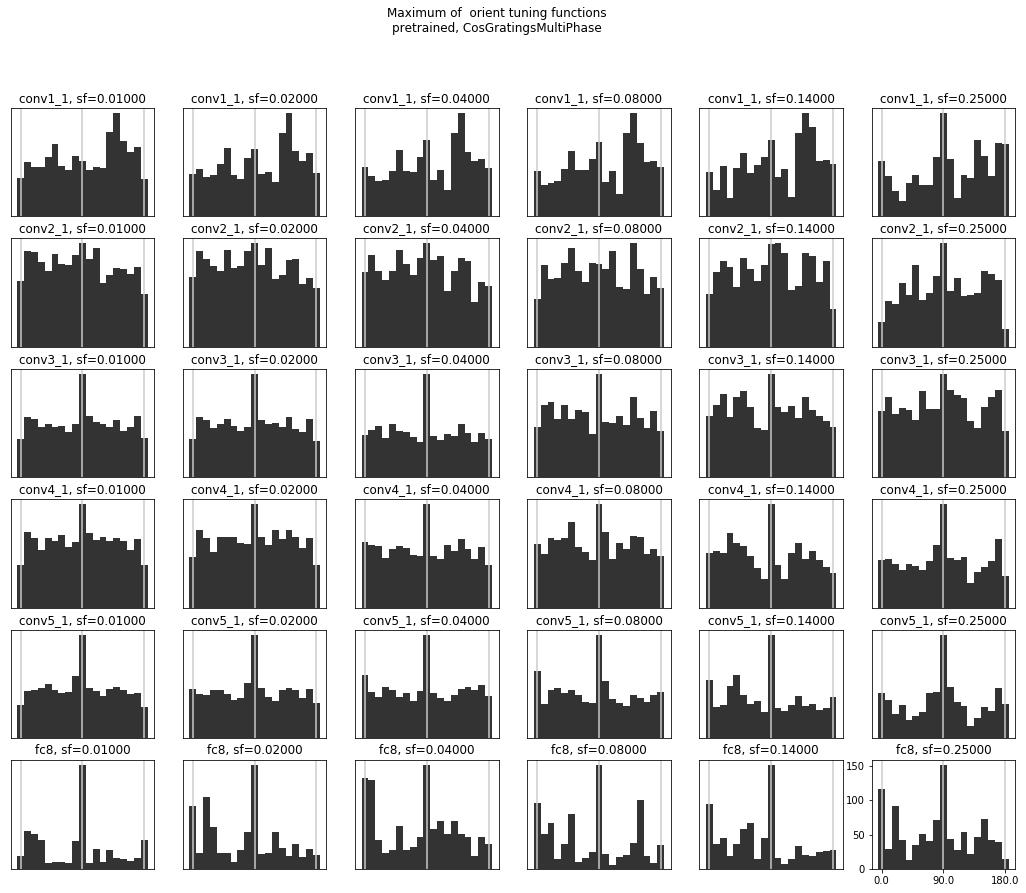

In [4]:
#%% plot distribution of the maximum values of tuning functions, for each layer

# Figure S3

plt.rcParams['figure.figsize']=[18,14]
plt.close('all')

layers2plot = [0,3,6,10,14,20]
nSF_plot =6
sf2plot = np.arange(0,nSF_plot,1)

npx = len(layers2plot)
npy = len(sf2plot)

ii=0

bin_size=10
plt.figure();

pi=0
for li, ll in enumerate(layers2plot):
  for sfi, sf in enumerate(sf2plot):
        
    pi=pi+1
    plt.subplot(npx,npy,pi)

    vals = fastpars_all[sf][ll]['maxori'][ii,:,0]
    unvals, counts = np.unique(vals, return_counts=True)

    h=plt.hist(vals,bins=np.arange(0,nOri+bin_size+1,bin_size)-bin_size/2,color=[0.2, 0.2, 0.2])
    
    if pi==npx*npy:
      plt.xticks(np.arange(0,nOri+1,nOri/2), np.arange(0,nOri+1,nOri/2))  
    else:
      plt.xticks([])
      plt.yticks([])
    for xx in np.arange(0,nOri+1, nOri/2):
      plt.axvline(xx,color=[0.8, 0.8, 0.8])
    plt.title('%s, sf=%.5f'%(layer_labels[ll], sf_vals[sf]))

plt.suptitle('Maximum of  orient tuning functions\n%s, %s'%(training_str,dataset))

Text(0.5,0.98,'Maximum of spatially-averaged orient tuning functions\npretrained, CosGratingsMultiPhase')

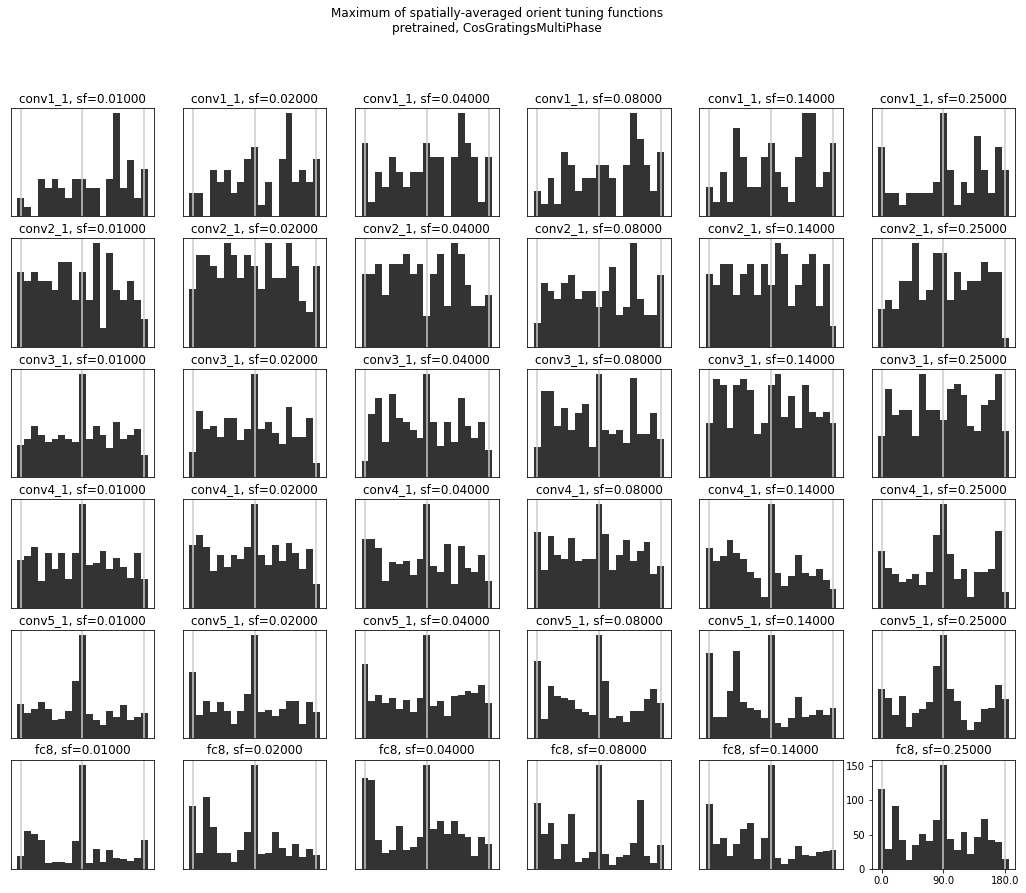

In [5]:
#%% plot distribution of the maximum values of SPATIALLY-AVERAGED tuning functions, for each layer

# Figure S3

plt.rcParams['figure.figsize']=[18,14]
plt.close('all')

layers2plot = [0,3,6,10,14,20]
nSF_plot =6
sf2plot = np.arange(0,nSF_plot,1)

npx = len(layers2plot)
npy = len(sf2plot)
ii=0

bin_size=10
plt.figure();

pi=0
for li, ll in enumerate(layers2plot):
  for sfi, sf in enumerate(sf2plot):

    pi=pi+1

    plt.subplot(npx,npy,pi)
    
    vals = fastpars_avgspace_all[sf][ll]['maxori'][ii,:,0]

    h=plt.hist(vals,bins=np.arange(0,nOri+bin_size+1,bin_size)-bin_size/2,color=[0.2, 0.2, 0.2])
    
    if pi==npx*npy:
      plt.xticks(np.arange(0,nOri+1,nOri/2), np.arange(0,nOri+1,nOri/2))  
    else:
      plt.xticks([])
      plt.yticks([])
    for xx in np.arange(0,nOri+1, nOri/2):
      plt.axvline(xx,color=[0.8, 0.8, 0.8])
    plt.title('%s, sf=%.5f'%(layer_labels[ll], sf_vals[sf]))

plt.suptitle('Maximum of spatially-averaged orient tuning functions\n%s, %s'%(training_str,dataset))

Text(0.5,0.98,'Orientation w maximum squared slope\npretrained, CosGratingsMultiPhase')

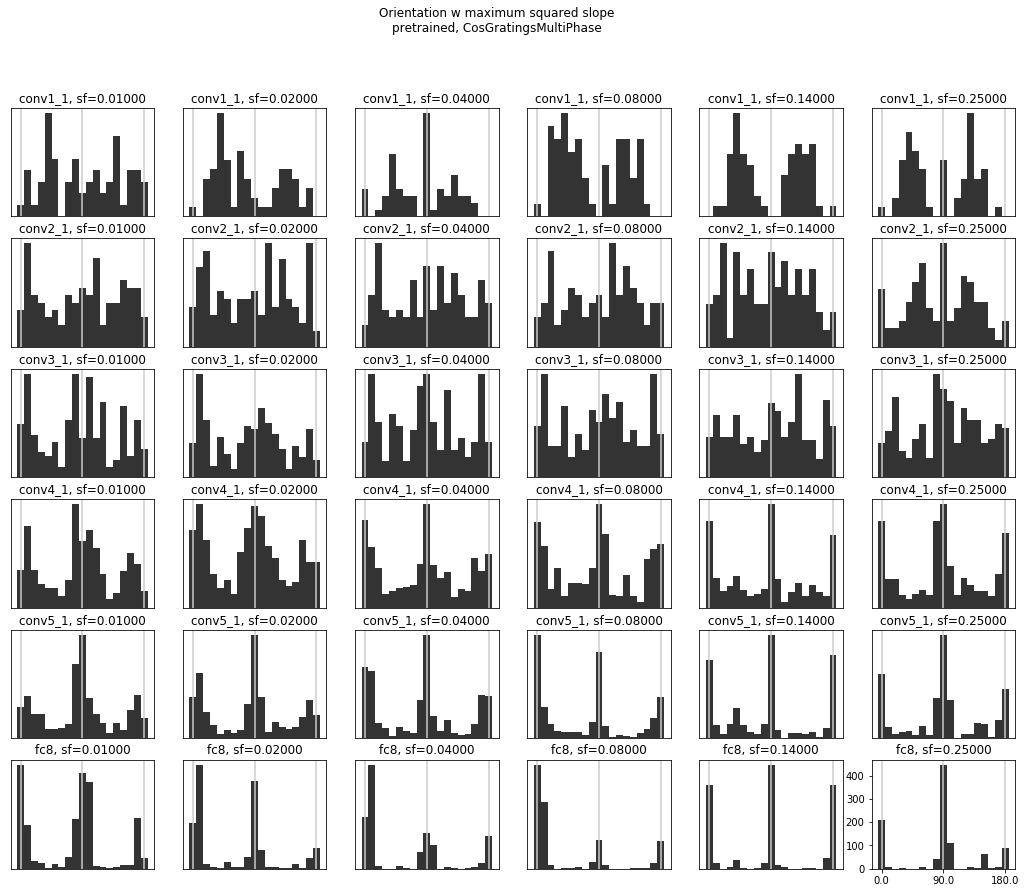

In [6]:
#%% plot distribution of the max-slope orientation of SPATIALLY-AVERAGED tuning functions, for each layer

plt.rcParams['figure.figsize']=[18,14]
plt.close('all')

layers2plot = [0,3,6,10,14,20]

sf2plot = np.arange(0,nSF,1)

npx = len(layers2plot)
npy = len(sf2plot)
ii=0

bin_size=10
plt.figure();

pi=0
for li, ll in enumerate(layers2plot):
  for sfi, sf in enumerate(sf2plot):
    
  
    pi=pi+1
    plt.subplot(npx,npy,pi)
    
    vals = fastpars_avgspace_all[sf][ll]['maxsqslopeori'][ii,:,0]

    h=plt.hist(vals,bins=np.arange(0,nOri+bin_size+1,bin_size)-bin_size/2,color=[0.2, 0.2, 0.2])
    if pi==npx*npy:
      plt.xticks(np.arange(0,nOri+1,nOri/2), np.arange(0,nOri+1,nOri/2))  
    else:
      plt.xticks([])
      plt.yticks([])
    for xx in np.arange(0,nOri+1, nOri/2):
      plt.axvline(xx,color=[0.8, 0.8, 0.8])
    plt.title('%s, sf=%.5f'%(layer_labels[ll], sf_vals[sf]))


plt.suptitle('Orientation w maximum squared slope\n%s, %s'%(training_str,dataset))

Text(0.5,0.98,'Spatially-averaged tuning functions\npretrained conv1_1\nCosGratingsMultiPhase, sf=0.25000')

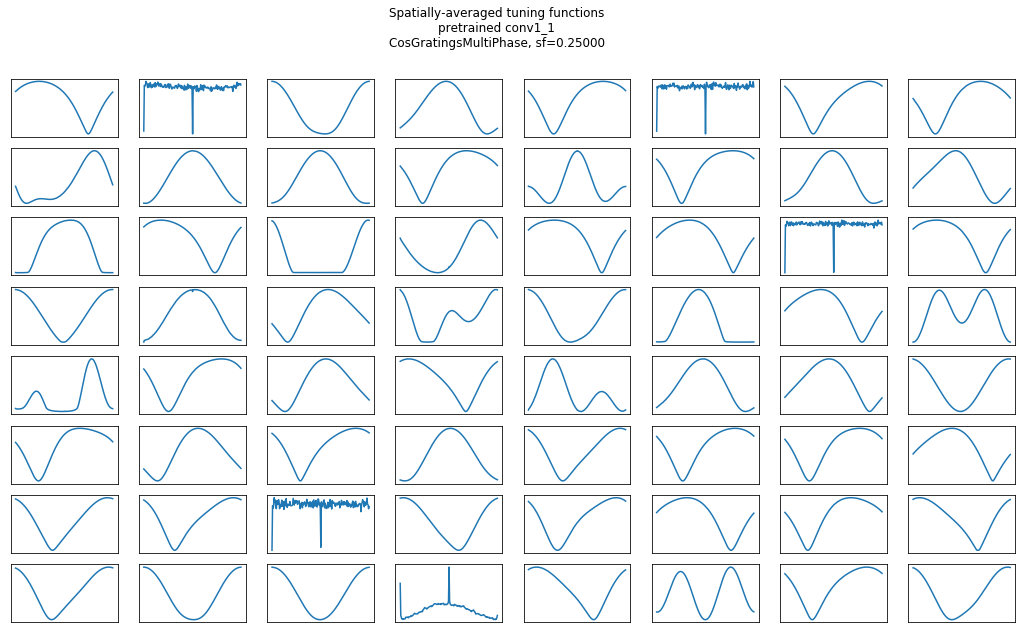

In [7]:
# Plot some examples of TFS
sf=5
nchannels = [np.shape(resp_curves_avgspace_all[sf][ll])[0] for ll in range(nLayers)]
ll=0
chans2plot = np.arange(0,nchannels[0])
plt.rcParams['figure.figsize']=[18,10]
plt.close('all')

npx = np.ceil(np.sqrt(len(chans2plot)))
npy = np.ceil(len(chans2plot)/npx)
ii=0

plt.figure();
layers2do = np.arange(0,nLayers,1)
for ci, cc in enumerate(chans2plot):
  
  plt.subplot(npx,npy,ci+1)
  
  tf = np.squeeze(resp_curves_avgspace_all[sf][ll][cc,:])
  
  plt.plot(ori_axis, tf)
  plt.yticks([])
  if ll==len(layers2do)-1:
    plt.xticks(np.arange(0,nOri+1,nOri/2), np.arange(0,181,90))  
  else:
    plt.xticks([])

plt.suptitle('Spatially-averaged tuning functions\n%s %s\n%s, sf=%.5f'%(training_str,layer_labels[ll],dataset, sf_vals[sf]))
 